In [2]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
file_path = 'C:/Users/ITASTAI/OneDrive - ABB/Desktop/Alarm Management/velocità fiamma/fiamv.xlsx'


df = pd.read_excel(file_path)
# Remove all duplicate rows
#df_cleaned = df.drop_duplicates(keep=False)
# Remove all duplicate rows based on the 'Data' column
df_cleaned = df.drop_duplicates(subset='Data', keep='first')
# Strip leading/trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Print the cleaned column names to verify
print(df_cleaned.columns)
df_cleaned.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ITASTAI/OneDrive - ABB/Desktop/Alarm Management/velocità fiamma/fiamv.xlsx'

In [2]:
file_path = 'fiamv.xlsx'
df = pd.read_excel(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'fiamv.xlsx'

In [ ]:
df_cleaned = df_cleaned.round(3)

In [ ]:
df_cleaned.describe()

,Data,50MAD10CS901 - VELOCITA TV [rpm],51MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm],51MBM13EU010ZV01 - FIAMMA [],52MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm],52MBM13EU010ZV01 - FIAMMA []
count,44640,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000
mean,2024-01-16 11:59:30,689.602268,803.271465,0.235663,775.450442,0.229592
min,2024-01-01 00:00:00,-0.002004,114.206390,0.000000,0.000000,0.000000
25%,2024-01-08 17:59:45,1.431541,124.533852,0.000000,118.655983,0.000000
50%,2024-01-16 11:59:30,1.433640,125.193054,0.000000,118.930656,0.000000
75%,2024-01-24 05:59:15,88.331612,126.731186,0.000000,119.315193,0.000000
max,2024-01-31 23:59:00,3006.241211,3015.180420,1.000000,3019.025879,1.000000
std,NaN,1248.987433,1217.269277,0.424417,1212.698503,0.420575


In [ ]:
display(df_cleaned)


,Data,50MAD10CS901 - VELOCITA TV [rpm],51MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm],51MBM13EU010ZV01 - FIAMMA [],52MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm],52MBM13EU010ZV01 - FIAMMA []
0,2024-01-01 00:00:00,1.431541,124.643730,0,118.875725,0
1,2024-01-01 00:01:00,1.431541,124.643730,0,118.875725,0
2,2024-01-01 00:02:00,1.433640,124.588799,0,118.875725,0
3,2024-01-01 00:03:00,1.431541,124.588799,0,118.875725,0
4,2024-01-01 00:04:00,1.431541,124.643730,0,118.875725,0
...,...,...,...,...,...,...
55676,2024-01-31 23:55:00,1.434021,124.698662,0,108.383461,0
55677,2024-01-31 23:56:00,1.433640,124.808525,0,108.383461,0
55678,2024-01-31 23:57:00,1.433640,124.808525,0,108.383461,0
55679,2024-01-31 23:58:00,1.433640,124.753593,0,108.493324,0


In [ ]:
df_cleaned.columns

Index(['Data', '50MAD10CS901 - VELOCITA TV [rpm]',
       '51MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm]',
       '51MBM13EU010ZV01 - FIAMMA []',
       '52MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm]',
       '52MBM13EU010ZV01 - FIAMMA []'],
      dtype='object')

In [ ]:
# Define a function to determine the operational status
def operational_status(row):
    if row['51MBM13EU010ZV01 - FIAMMA []'] > 0 and row['50MAD10CS901 - VELOCITA TV [rpm]'] > 125:
        return "impianto operativo"
    else:
        return "impianto non operativo"

# Apply the function to each row and create a new column
df_cleaned['Status'] = df_cleaned.apply(operational_status, axis=1)

# Save the result to a new Excel file
output_file_path = 'C:/Users/ITASTAI/OneDrive - ABB/Desktop/Alarm Management/velocità fiamma/fiamv_resampled.xlsx'
df_cleaned.to_excel(output_file_path, index=False)
df_cleaned['51MBM13EU010ZV01 - FIAMMA []'] = df_cleaned['51MBM13EU010ZV01 - FIAMMA []'].apply(lambda x: 1 if x > 0 else x)
df_cleaned['52MBM13EU010ZV01 - FIAMMA []'] = df_cleaned['52MBM13EU010ZV01 - FIAMMA []'].apply(lambda x: 1 if x > 0 else x)
# Display more rows in the output
pd.set_option('display.max_rows', 100)

# Display the DataFrame
display(df_cleaned.iloc[690:745])

C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\2001308446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Status'] = df_cleaned.apply(operational_status, axis=1)
C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\2001308446.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['51MBM13EU010ZV01 - FIAMMA []'] = df_cleaned['51MBM13EU010ZV01 - FIAMMA []'].apply(lambda x: 1 if x > 0 else x)
C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\2001308446.py:15: SettingWithCopyWarni

,Data,50MAD10CS901 - VELOCITA TV [rpm],51MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm],51MBM13EU010ZV01 - FIAMMA [],52MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm],52MBM13EU010ZV01 - FIAMMA [],Status
1039,2024-01-01 11:30:00,1.433640,124.753593,0,118.875725,0,impianto non operativo
1040,2024-01-01 11:31:00,1.434021,124.753593,0,118.875725,0,impianto non operativo
1042,2024-01-01 11:32:00,1.433640,124.478920,0,118.875725,0,impianto non operativo
1044,2024-01-01 11:33:00,1.434021,124.478920,0,118.601051,0,impianto non operativo
1046,2024-01-01 11:34:00,1.433640,124.423988,0,118.601051,0,impianto non operativo
1047,2024-01-01 11:35:00,1.433640,124.423988,0,119.040520,0,impianto non operativo
1049,2024-01-01 11:36:00,1.433640,124.533852,0,119.040520,0,impianto non operativo
1050,2024-01-01 11:37:00,1.433640,124.533852,0,119.040520,0,impianto non operativo
1052,2024-01-01 11:38:00,1.433640,124.533852,0,118.820786,0,impianto non operativo
1053,2024-01-01 11:39:00,1.433640,124.533852,0,118.820786,0,impianto non operativo


In [ ]:
# Assuming df_cleaned is already loaded and 'Data' is set as the index
# Filter the DataFrame based on the conditions
operative_df = df_cleaned[
    (df_cleaned['51MBM13EU010ZV01 - FIAMMA []'] > 0) &
    (df_cleaned['52MBM13EU010ZV01 - FIAMMA []'] > 0) &
    (df_cleaned['50MAD10CS901 - VELOCITA TV [rpm]'] > 125) &
    (df_cleaned['51MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm]'] > 125) &
    (df_cleaned['52MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm]'] > 125)
]

# Reset the index to include 'Data' as a column
operative_df.reset_index(inplace=True)

# Extract the desired columns from the filtered DataFrame
operative_data = operative_df[['Data', '50MAD10CS901 - VELOCITA TV [rpm]', 
                               '51MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm]',
                               '51MBM13EU010ZV01 - FIAMMA []',
                               '52MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm]',
                               '52MBM13EU010ZV01 - FIAMMA []',
                               '52MBM13EU010ZV01 - FIAMMA []', 
                               'Status']]

# Convert the dates to the desired format
operative_data['Data'] = operative_data['Data'].dt.strftime('%Y-%m-%d %H:%M:%S')
# Display all rows and columns without truncation

#dc = operative_data.drop_duplicates(keep=False)

from IPython.core.display import HTML

# Display the entire DataFrame as an HTML table
#HTML(operative_data.to_html())


In [ ]:

# # Convert the 'Data' column to datetime format
# df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'], format='%d/%m/%Y %H:%M')

# # Set 'Data' as the index
# df_cleaned.set_index('Data', inplace=True)

# # Filter out only the numeric columns
# numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# # Resample the data to daily frequency and calculate the mean
# df_resampled_daily = df_cleaned[numeric_cols].resample('d').mean().reset_index()

# # Save the result to a new Excel file
# output_file_path = 'C:/Users/ITASTAI/OneDrive - ABB/Desktop/Alarm Management/velocità fiamma/fiamv_resampled_daily.xlsx'
# df_resampled_daily.to_excel(output_file_path, index=False)
# # Convert values greater than 0 to 1 in the 'fiamma' columns
# df_resampled_daily['51MBM13EU010ZV01 - FIAMMA []'] = df_resampled_daily['51MBM13EU010ZV01 - FIAMMA []'].apply(lambda x: 1 if x > 0 else x)
# df_resampled_daily['52MBM13EU010ZV01 - FIAMMA []'] = df_resampled_daily['52MBM13EU010ZV01 - FIAMMA []'].apply(lambda x: 1 if x > 0 else x)


# # Display the DataFrame
# display(df_resampled_daily)

In [ ]:
# # Set the index of the DataFrame to the 'Data' column
# df_resampled_daily.set_index('Data', inplace=True)

# # Plotting the data
# fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the size to your preference

# # The width of a bar
# width = 0.2  

# # Positions for the bars
# positions = np.arange(len(df_resampled_daily))

# # Plotting the bars for each column of interest
# ax.bar([p - width for p in positions], df_resampled_daily['50MAD10CS901 - VELOCITA TV [rpm]'], width=width, label='50MAD10CS901 - VELOCITA TV [rpm]', color='green')
# ax.bar(positions, df_resampled_daily['51MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm]'], width=width, label='51MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm]', color='orange')
# ax.bar([p + width for p in positions], df_resampled_daily['52MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm]'], width=width, label='52MBA10CS902XQ01 - VELOCITA TG (PROT) [rpm] [rpm]', color='red')

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_xlabel('Time')
# ax.set_ylabel('velocity [rpm]')
# ax.set_title('Andamento velocità impianto')
# ax.set_xticks(positions)
# ax.set_xticklabels(df_resampled_daily.index.strftime('%Y-%m-%d'), rotation=90)
# ax.legend()

# # Show the plot
# plt.show()


In [ ]:
file2 = r'C:\Users\ITASTAI\OneDrive - ABB\Desktop\Jan2.xlsx'

prio1_df = pd.read_excel(file2)

In [ ]:
# Convert the 'Data' columns to datetime format with appropriate format
###### drop column classification
df_cleaned = df_cleaned.copy()
df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'], format='%d/%m/%Y %H:%M', errors='coerce')

# prio1_df = prio1_df.copy()
prio1_df['Data'] = pd.to_datetime(prio1_df['Data'], format='%d/%m/%Y %H:%M:%S.%f', errors='coerce')

# Round the 'Data' columns to the nearest minute to facilitate matching       ###############don't like!
df_cleaned['Data'] = df_cleaned['Data'].dt.round('min')
prio1_df['Data'] = prio1_df['Data'].dt.round('min')

# Set 'Data' column as index
df_cleaned.set_index('Data', inplace=True)
prio1_df.set_index('Data', inplace=True)

# Create a status map from df_cleaned
status_map = df_cleaned['Status'].to_dict()

# Define a function to determine the operational status for prio1_df
def map_status(row):
    return status_map.get(row.name, 'unknown')  # row.name gives the index which is the timestamp

# Apply the function to each row in prio1_df and create a new column
prio1_df['Status'] = prio1_df.apply(map_status, axis=1)

# Reset index to turn the 'Data' column back into a regular column
prio1_df.reset_index(inplace=True)

# Optionally, save the updated prio1_df to a new Excel file
output_file_path_prio1 = 'C:/Users/ITASTAI/OneDrive - ABB/Desktop/Alarm Management/velocità fiamma/prio1_resampled.xlsx'
prio1_df.to_excel(output_file_path_prio1, index=False)

# # Display the updated prio1_df
# pd.set_option('display.max_rows', 100)
# display(prio1_df)
prio1_df.head(100)


,Data,Tag,Message,State,Priority,Status
0,2024-01-01 10:46:00,DIAG_PRTG_ALLARME_ALTO,###DIAG_PRTG_ALLARME_ALTO###ALLARME PRTG GRAVE...,ACT/ACK,1,impianto non operativo
1,2024-01-01 10:46:00,AC06,###AC06###AC06 Process Station###AC06###MSR_RE...,ACT/ACK,1,impianto non operativo
2,2024-01-01 10:47:00,50LBB01CT902YP50,###50LBB01CT902YP50###BASSA TEMP. VAP. SAT. CO...,ACT/ACK,1,impianto non operativo
3,2024-01-01 10:48:00,50LBB01CT902YP50,###50LBB01CT902YP50###BASSA TEMP. VAP. SAT. CO...,ACT/ACK,1,impianto non operativo
4,2024-01-01 10:48:00,50LBB01CT902YP50,###50LBB01CT902YP50###BASSA TEMP. VAP. SAT. CO...,ACT/ACK,1,impianto non operativo
5,2024-01-01 10:48:00,50LBB01CT902YP50,###50LBB01CT902YP50###BASSA TEMP. VAP. SAT. CO...,ACT/ACK,1,impianto non operativo
6,2024-01-01 10:48:00,50LBB01CT902YP50,###50LBB01CT902YP50###BASSA TEMP. VAP. SAT. CO...,ACT/ACK,1,impianto non operativo
7,2024-01-01 10:48:00,50LBB01CT902YP50,###50LBB01CT902YP50###BASSA TEMP. VAP. SAT. CO...,ACT/ACK,1,impianto non operativo
8,2024-01-01 10:48:00,50LBB01CT902YP50,###50LBB01CT902YP50###BASSA TEMP. VAP. SAT. CO...,ACT/ACK,1,impianto non operativo
9,2024-01-01 10:48:00,50LBB01CT902YP50,###50LBB01CT902YP50###BASSA TEMP. VAP. SAT. CO...,ACT/ACK,1,impianto non operativo


In [ ]:
prio1_df.head()

,Data,Tag,Message,State,Priority,Status
0,2024-01-01 10:46:00,DIAG_PRTG_ALLARME_ALTO,###DIAG_PRTG_ALLARME_ALTO###ALLARME PRTG GRAVE...,ACT/ACK,1,impianto non operativo
1,2024-01-01 10:46:00,AC06,###AC06###AC06 Process Station###AC06###MSR_RE...,ACT/ACK,1,impianto non operativo
2,2024-01-01 10:47:00,50LBB01CT902YP50,###50LBB01CT902YP50###BASSA TEMP. VAP. SAT. CO...,ACT/ACK,1,impianto non operativo
3,2024-01-01 10:48:00,50LBB01CT902YP50,###50LBB01CT902YP50###BASSA TEMP. VAP. SAT. CO...,ACT/ACK,1,impianto non operativo
4,2024-01-01 10:48:00,50LBB01CT902YP50,###50LBB01CT902YP50###BASSA TEMP. VAP. SAT. CO...,ACT/ACK,1,impianto non operativo


In [ ]:
from pandasgui import show

# Display the DataFrame using pandasgui
gui = show(prio1_df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\1446786869.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gui = show(prio1_df)
C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\1446786869.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gui = show(prio1_df)
C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\1446786869.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

In [ ]:
prio1_df['Status'] = prio1_df.apply(map_status, axis=1)

# Filtra il DataFrame per includere solo le righe con Status uguale a 'impianto operativo'
impianto_operativo_df = prio1_df[prio1_df['Status'] == 'impianto operativo']

# Mostra le prime 10 righe del DataFrame filtrato
impianto_operativo_df.head(10)
gui = show(impianto_operativo_df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\2843914461.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\2843914461.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\2843914461.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ITASTAI\AppData\Local\Temp\ipyk

In [ ]:
impianto_operativo_df.head()

,Data,Tag,Message,State,Priority,Status


In [ ]:
len(impianto_operativo_df)

0

In [ ]:

s = len(impianto_operativo_df)

print(s)

0


In [ ]:
# Filtra il DataFrame per includere solo le righe con Status uguale a 'impianto operativo'
impianto_non_operativo_df = prio1_df[prio1_df['Status'] == 'impianto non operativo']

# Mostra le prime 10 righe del DataFrame filtrato
impianto_non_operativo_df.head(100)


ss = len(impianto_non_operativo_df)

ss


gui = show(impianto_non_operativo_df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\103909071.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\103909071.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\103909071.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ITASTAI\AppData\Local\Temp\ipyk

# Based on the analysis I've done, during the operative status of the plant we have just 25998 alarms in january. So, we reduced the amount of alarms 47%

In [ ]:
# Filtra il DataFrame per rimuovere le righe in cui il messaggio contiene 'SHLV'
impianto_operativo_df_s = impianto_operativo_df[~impianto_operativo_df['Message'].str.contains('SHLV', na=False)]


gui = show(impianto_operativo_df_s)



PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\3895404582.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\3895404582.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ITASTAI\AppData\Local\Temp\ipykernel_21652\3895404582.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ITASTAI\AppData\Local\Temp\ipyk

In [ ]:


print(len(impianto_operativo_df_s))


output_file = 'C:/Users/ITASTAI/OneDrive - ABB/Desktop/Alarm Management/velocità fiamma/impianto_operativo_df_s.xlsx'

impianto_operativo_df_s.to_excel(output_file, index=False)


0


# Passo successivo: rimuovere tag non KKS, le tag che non seguono lo standard KKS si riferiscono agli allarmi di sistema

In [ ]:
# Filter the DataFrame to include only rows where the length of the 'Tag' column is between 11 and 16 characters
filtered_length_df = impianto_operativo_df_s[impianto_operativo_df_s['Tag'].str.len().between(11, 16)]

# Further filter to exclude rows where the 'Tag' column contains an underscore
filtered_df = filtered_length_df[~filtered_length_df['Tag'].str.contains('_', '-')]

# Display the first 10 rows of the filtered DataFrame
filtered_df.head(10)



,Data,Tag,Message,State,Priority,Status


In [ ]:
# Get the number of rows that meet the criteria
num_filtered_rows = len(filtered_df)
num_filtered_rows


0

In [ ]:
# Check the occurrence of each tag
tag_occurrences = filtered_df['Tag'].value_counts()

# Display the occurrences of each tag
print(tag_occurrences)

Series([], Name: count, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

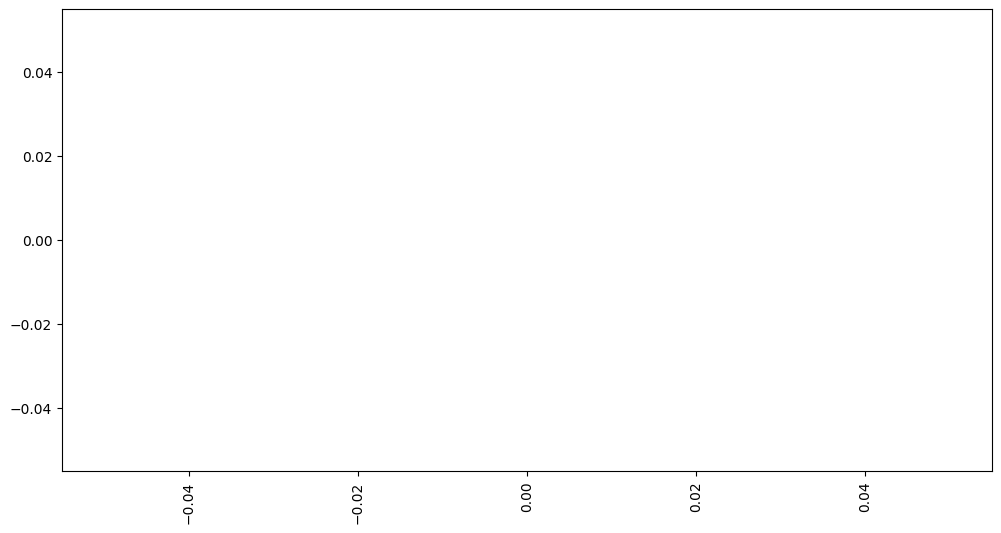

In [ ]:

import matplotlib.pyplot as plt

# Check the occurrence of each tag
tag_occurrences = filtered_df['Tag'].value_counts()

# Calculate the cumulative percentage of the tag occurrences
cumulative_percentage = tag_occurrences.cumsum() / tag_occurrences.sum()

# Find the tags that contribute to 80% of the alarms
threshold = 0.80
tags_80_percent = cumulative_percentage[cumulative_percentage <= threshold].index

# Filter the tag occurrences to include only those tags
filtered_tag_occurrences = tag_occurrences.loc[tags_80_percent]

# Create a bar plot of the tags that cause 80% of the alarms
plt.figure(figsize=(12, 6))
filtered_tag_occurrences.plot(kind='bar')
plt.title('Tags that Cause 80% of the Alarms')
plt.xlabel('Tag')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)
plt.show()


# tags related to system

In [ ]:
# Filter the DataFrame to include only rows where the length of the 'Tag' column is NOT between 11 and 16 characters
# or where the 'Tag' column contains an underscore
excluded_df = impianto_operativo_df_s[
    ~(
        impianto_operativo_df_s['Tag'].str.len().between(11, 16) & 
        ~impianto_operativo_df_s['Tag'].str.contains('_')
    )
]

# Display the first 10 rows of the filtered DataFrame with excluded tags
excluded_df.head(10)




,Data,Tag,Message,State,Priority,Classification,Status
9067,2024-01-09 14:59:00,51_S086_VA_188,###51_S086_VA_188###APERTURA BLOW-OFF MP FLUSS...,ACT/ACK,1,non operativo,impianto operativo
9068,2024-01-09 14:59:00,51_S086_VA_187,###51_S086_VA_187###STATO AVV. PER BLOW-OFF MP...,ACT/ACK,1,non operativo,impianto operativo
9069,2024-01-09 14:59:00,51_S088_VA_190,###51_S088_VA_190###APERTURA BLOW-OFF AP FLUSS...,ACT/ACK,1,non operativo,impianto operativo
9070,2024-01-09 14:59:00,51_S088_VA_189,###51_S088_VA_189###STATO AVV. PER BLOW-OFF AP...,ACT/ACK,1,non operativo,impianto operativo
9071,2024-01-09 14:59:00,51_S090_VA_192,###51_S090_VA_192###APERTURA BLOW-OFF BP FLUSS...,ACT/ACK,1,non operativo,impianto operativo
9072,2024-01-09 14:59:00,51_S090_VA_191,###51_S090_VA_191###STATO AVV. PER BLOW-OFF BP...,ACT/ACK,1,non operativo,impianto operativo
9146,2024-01-09 15:05:00,51CHA01A_GEN_TG_CAXS02,###51CHA01A_GEN_TG_CAXS02###ECCITAZIONE ON###A...,ACT,1,non operativo,impianto operativo
9151,2024-01-09 15:05:00,TG51_CO_5M_DCS,###TG51_CO_5M_DCS###Media 5 minuti Normal. CO ...,ACT/ACK,1,non operativo,impianto operativo
9152,2024-01-09 15:05:00,TG51_NOx_5M_DCS,###TG51_NOx_5M_DCS###Media 5 minuti Normal. NO...,ACT/ACK,1,non operativo,impianto operativo
9163,2024-01-09 15:12:00,51_S164_VA_127,###51_S164_VA_127###GRAD.RISCALD.CORPO CALDAIA...,ACT/ACK,1,non operativo,impianto operativo


In [ ]:
# Get the number of rows that do not meet the criteria
num_excluded_rows = len(excluded_df)
num_excluded_rows

7024